https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#### 데이터 확인

In [2]:
data = pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

필요없는 변수 제거

In [5]:
data.drop(["CLIENTNUM", 
           "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", 
           "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], 
          axis=1, inplace=True)

범주형

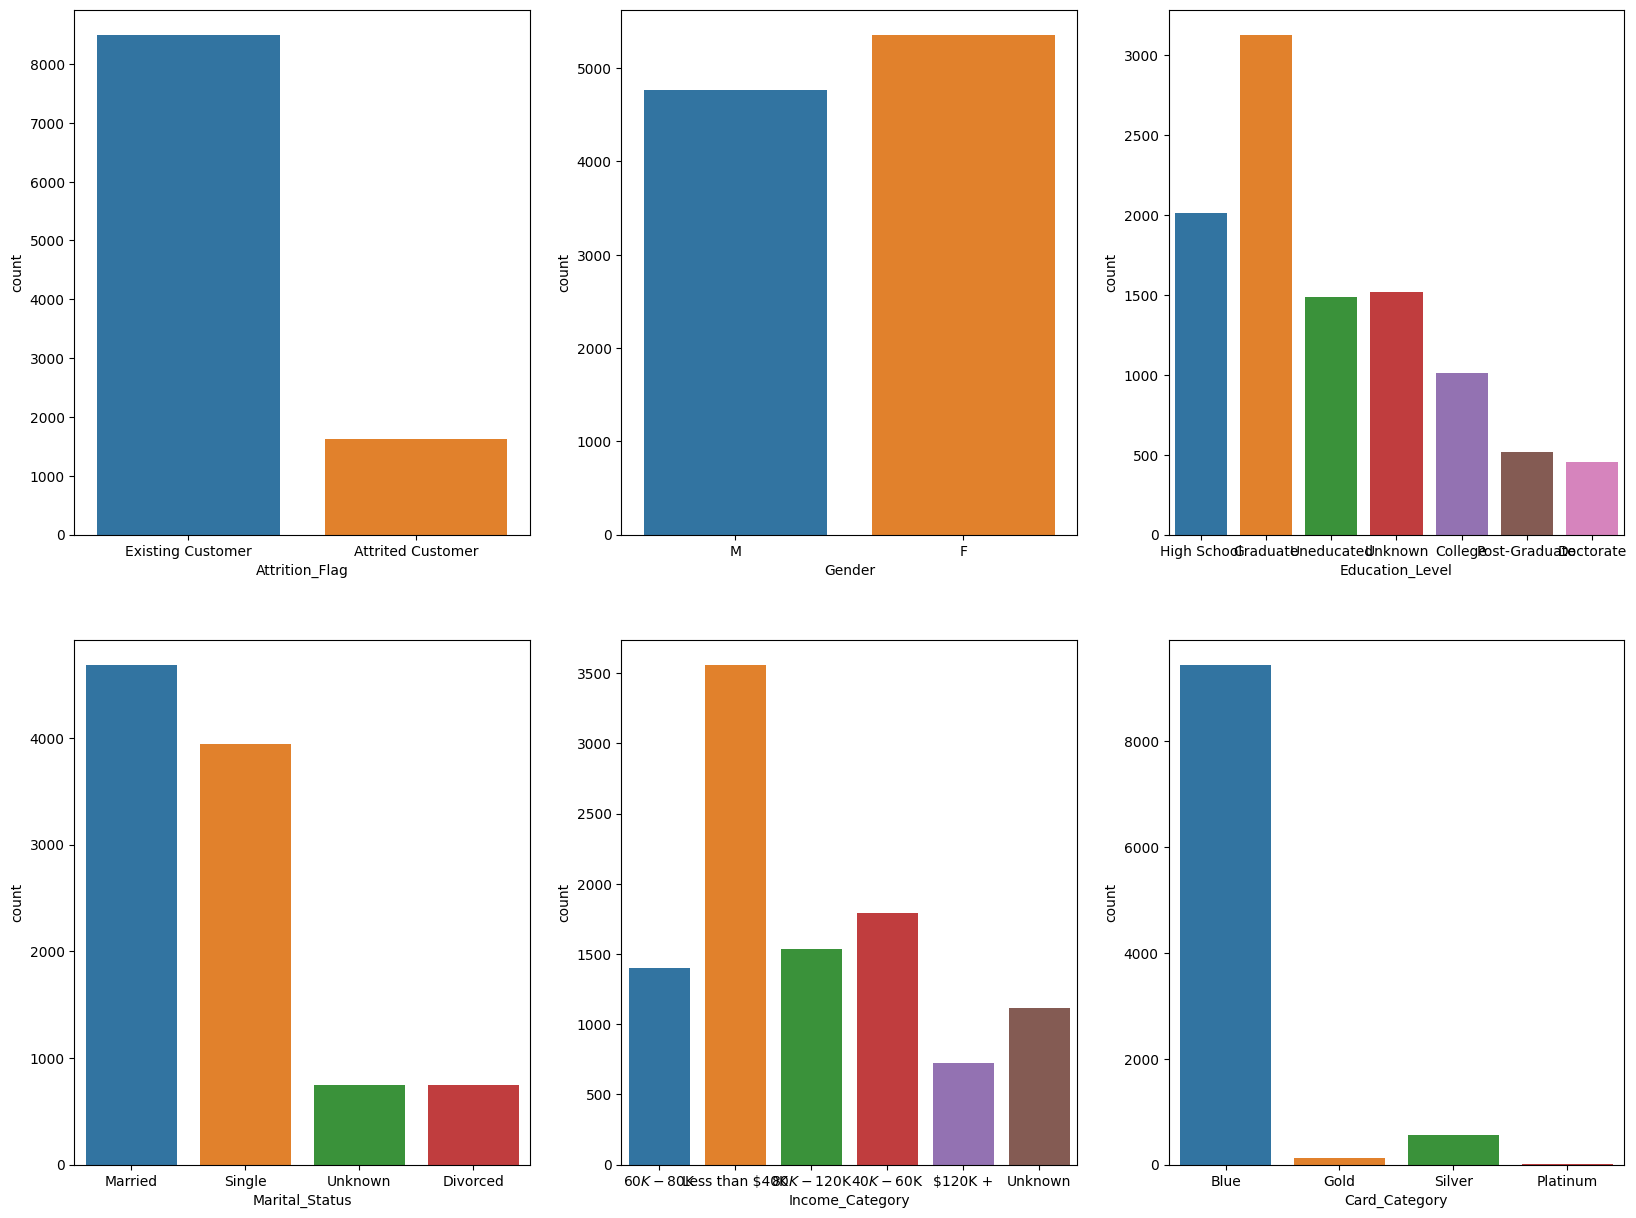

In [6]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,15))

sns.countplot(data=data, x = 'Attrition_Flag', ax=ax[0,0])
sns.countplot(data=data, x = 'Gender', ax=ax[0,1])
sns.countplot(data=data, x = 'Education_Level', ax=ax[0,2])
sns.countplot(data=data, x = 'Marital_Status', ax=ax[1,0])
sns.countplot(data=data, x = 'Income_Category', ax=ax[1,1])
sns.countplot(data=data, x = 'Card_Category', ax=ax[1,2])

plt.show()

수치형

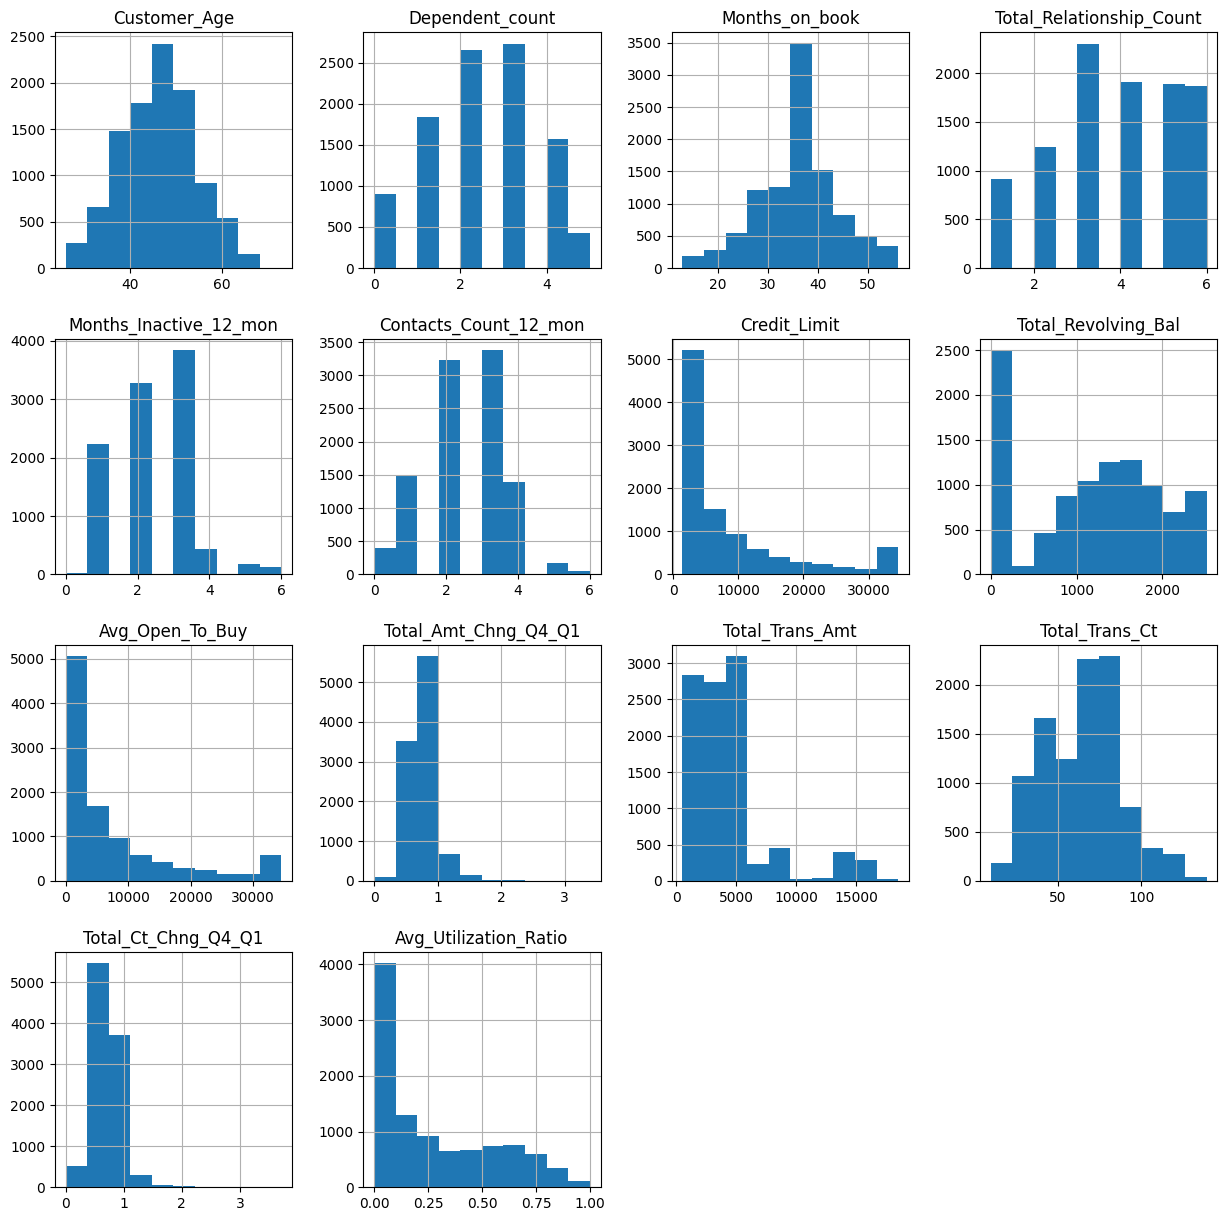

In [7]:
data.hist(figsize=(15,15))
plt.show()

#### 전처리

데이터 나누기

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

범주형 가변수 처리

In [16]:
X_train_object = X_train.select_dtypes(include=['object'])
X_train_object = pd.get_dummies(X_train_object)
X_train_object = X_train_object.reset_index(drop=True)

In [17]:
X_test_object = X_test.select_dtypes(include=['object'])
X_test_object = pd.get_dummies(X_test_object)
X_test_object = X_test_object.reset_index(drop=True)

수치형 스케일링

In [18]:
X_train_numeric=X_train.select_dtypes(exclude=['object'])
X_test_numeric=X_test.select_dtypes(exclude=['object'])

In [19]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train_numeric)

X_train_numeric = scaler.transform(X_train_numeric)
X_test_numeric = scaler.transform(X_test_numeric)

In [20]:
numeric_col = X_train.select_dtypes(exclude=['object']).columns.tolist()
X_train_numeric = pd.DataFrame(X_train_numeric, columns=numeric_col)
X_test_numeric = pd.DataFrame(X_test_numeric, columns=numeric_col)

합치기

In [22]:
X_train = pd.concat([X_train_object, X_train_numeric], axis=1)
X_test = pd.concat([X_test_object, X_test_numeric], axis=1)

#### 모델링

RandomForest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# default
clf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=0)
clf.fit(X_train, y_train)

predict1 = clf.predict(X_test)
print(accuracy_score(y_test, predict1))

0.910167818361303


In [25]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predict1)
print(cf)

[[ 193  162]
 [  20 1651]]


정확도 약 91%    
실제 Existing customer인데 Attrite customer로 예측한 경우 : 162

In [26]:
# sample 100개, tree depth = 20
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
clf.fit(X_train, y_train)

predict2 = clf.predict(X_test)
print(accuracy_score(y_test, predict2))

0.956071076011846


In [27]:
cf = confusion_matrix(y_test, predict2)
print(cf)

[[ 287   68]
 [  21 1650]]


정확도 약 96%    
실제 Existing customer인데 Attrite customer로 예측한 경우 : 68 → 감소    
sample의 수를 늘리고, 트리의 깊이를 증가했더니 정확도가 증가함

Gradient Boosting Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

# default
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)

predict1 = gb_clf.predict(X_test)
print(accuracy_score(y_test, predict1))

0.9634748272458046


In [34]:
print(confusion_matrix(y_test, predict1))

[[ 303   52]
 [  22 1649]]


In [41]:
# sample 300개, learning_rate=0.5
gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.5, random_state=0)
gb_clf.fit(X_train, y_train)

predict2 = gb_clf.predict(X_test)
print(accuracy_score(y_test, predict2))

0.9743336623889437


In [42]:
print(confusion_matrix(y_test, predict1))

[[ 303   52]
 [  22 1649]]


샘플 수를 증가해 정확도는 가장 높았으나, 시간이 오래 걸림